# Optimasi Parameter Support Vector Machine (SVM) menggunakan Particle Swarm Optimization (PSO) untuk Klasifikasi Data Makanan.

### Oleh Kelompok 13
- Lani Nur Patria
- Muhammad Rizqi Winnel Adnin
- Rizka Nurhidayati
- Salsya Fadillah R

## 1. Pendahuluan

Proyek ini bertujuan untuk melakukan optimasi hyperparameter pada algoritma Support Vector Machine (SVM) guna meningkatkan performa klasifikasi. Dataset yang digunakan adalah `food_items.csv`, yang berisi informasi nutrisi berbagai item makanan, dengan tujuan untuk mengklasifikasikan kategori makanan.

Metode optimasi yang akan diimplementasikan adalah Particle Swarm Optimization (PSO). PSO akan digunakan untuk mencari kombinasi parameter optimal untuk SVM (khususnya parameter `C` dan `gamma` untuk kernel RBF) yang dapat memaksimalkan akurasi klasifikasi pada data validasi.

Tahapan utama dalam proyek ini:
1.  Studi literatur dan pemahaman algoritma SVM dan PSO.
2.  Persiapan data: memuat dataset, melakukan pre-processing yang diperlukan (seperti encoding, scaling, dan pemisahan data).
3.  Implementasi algoritma Particle Swarm Optimization (PSO).
4.  Integrasi PSO dengan model SVM untuk mengevaluasi setiap set parameter.
5.  Pelatihan dan evaluasi model SVM dengan parameter hasil optimasi.
6.  Analisis hasil dan kesimpulan.

## 2. Deskripsi Algoritma

### 2.1. Support Vector Machine (SVM)

**Support Vector Machine (SVM)** adalah algoritma *supervised learning* yang bertujuan untuk menemukan *hyperplane* optimal yang berfungsi sebagai pemisah antar kelas dalam ruang fitur N-dimensi. "Optimal" didefinisikan sebagai *hyperplane* yang memiliki **margin** maksimum, yaitu jarak terbesar antara *hyperplane* dengan titik data terdekat dari masing-masing kelas. Titik-titik data yang terletak tepat di margin ini disebut **Support Vectors**, karena merekalah yang "mendukung" atau menentukan posisi dan orientasi dari *hyperplane*.

#### Formulasi Matematis

1.  **Kasus Linear (Hard Margin):** Untuk data yang dapat dipisahkan secara linear, SVM mencari *hyperplane* yang didefinisikan oleh $w^T x + b = 0$, di mana $w$ adalah vektor bobot dan $b$ adalah bias. Tujuannya adalah untuk memaksimalkan margin, yang setara dengan meminimalkan $||w||^2$, dengan batasan bahwa semua titik data terklasifikasi dengan benar:
    $$y_i(w^T x_i + b) \geq 1 \quad \text{untuk semua } i=1, \dots, n$$
    di mana $x_i$ adalah vektor fitur dan $y_i \in \{-1, 1\}$ adalah label kelasnya.

2.  **Kasus Soft Margin:** Untuk data yang tidak dapat dipisahkan secara linear, diperkenalkan *slack variable* $\xi_i \geq 0$ untuk memperbolehkan beberapa kesalahan klasifikasi. Masalah optimasinya menjadi:
    $$\min_{w, b, \xi} \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i$$
    dengan batasan $y_i(w^T x_i + b) \geq 1 - \xi_i$. Parameter **C > 0** adalah parameter regularisasi yang mengontrol *trade-off* antara memaksimalkan margin dan meminimalkan jumlah kesalahan klasifikasi. Nilai `C` yang besar memberikan penalti yang tinggi untuk kesalahan, sementara nilai `C` yang kecil memperbolehkan margin yang lebih lebar dengan lebih banyak kesalahan.

3.  **Kernel Trick (Kasus Non-Linear):** Ketika data tidak dapat dipisahkan oleh *hyperplane* linear, data dipetakan ke ruang fitur berdimensi lebih tinggi menggunakan fungsi pemetaan $\phi(x)$. *Kernel Trick* memungkinkan perhitungan produk skalar di ruang berdimensi tinggi ini tanpa melakukan transformasi secara eksplisit, yaitu dengan menggunakan fungsi kernel $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$. Kernel yang umum digunakan adalah **Radial Basis Function (RBF)**:
    $$K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2)$$
    Parameter **$\gamma$ (gamma)** mendefinisikan seberapa besar pengaruh satu sampel pelatihan. Nilai $\gamma$ yang besar menghasilkan batas keputusan yang lebih kompleks dan berpotensi *overfitting*.

### 2.2. Particle Swarm Optimization (PSO)

**Particle Swarm Optimization (PSO)** adalah algoritma optimasi stokastik berbasis populasi yang terinspirasi oleh perilaku sosial kawanan burung atau ikan. Algoritma ini mencari solusi optimal dengan menjaga populasi kandidat solusi, yang disebut **partikel**, dan menggerakkannya di sekitar ruang pencarian berdasarkan aturan gerak yang sederhana.

Setiap partikel memiliki posisi (yang merepresentasikan satu set solusi, dalam kasus ini parameter `C` dan `gamma`) dan kecepatan. Gerakan setiap partikel dipengaruhi oleh dua komponen utama: pengalaman terbaiknya sendiri (**personal best**, $pbest$) dan pengalaman terbaik dari keseluruhan kawanan (**global best**, $gbest$).

#### Formulasi Matematis

Gerakan partikel $i$ pada setiap iterasi $t$ diupdate melalui dua persamaan utama:

1.  **Pembaruan Kecepatan (Velocity Update):**
    $$v_i(t+1) = w \cdot v_i(t) + c_1 \cdot r_1 \cdot (pbest_i(t) - x_i(t)) + c_2 \cdot r_2 \cdot (gbest(t) - x_i(t))$$
    di mana:
    * $v_i(t)$ adalah vektor kecepatan partikel $i$ pada iterasi $t$.
    * $x_i(t)$ adalah vektor posisi partikel $i$ pada iterasi $t$.
    * $w$ adalah **bobot inersia**, yang mengontrol momentum partikel.
    * $c_1$ dan $c_2$ adalah **koefisien akselerasi** kognitif dan sosial.
    * $r_1$ dan $r_2$ adalah angka acak antara [0, 1] untuk memberikan elemen stokastik.
    * $pbest_i(t)$ adalah posisi terbaik yang pernah ditemukan oleh partikel $i$ hingga iterasi $t$.
    * $gbest(t)$ adalah posisi terbaik yang pernah ditemukan oleh seluruh kawanan hingga iterasi $t$.

2.  **Pembaruan Posisi (Position Update):**
    $$x_i(t+1) = x_i(t) + v_i(t+1)$$
    Melalui proses iteratif ini, kawanan partikel secara kolektif bergerak menuju area yang lebih menjanjikan dalam ruang pencarian, dan pada akhirnya konvergen ke solusi optimal.

Import Library yang diperlukan

In [1]:
# 1. Impor Library Utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Pre-processing Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Untuk Model SVM
from sklearn.svm import SVC

# Untuk Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Untuk timing run program
import time

# Mengatur agar plot ditampilkan inline di Jupyter Notebook
%matplotlib inline

## 3. Pemuatan dan Pre-processing Data

Selanjutnya akan dilakukan Pemuatan dan Pre-processing Data dengan tahapan sebagai berikut:
1.  Memuat dataset `food_items.csv`.
2.  Melakukan inspeksi awal data (melihat beberapa baris pertama, informasi dataset, dan statistik deskriptif).
3.  Mengidentifikasi fitur (variabel independen) dan target (variabel dependen).
4.  Menangani nilai yang hilang (jika ada).
5.  Melakukan encoding pada fitur kategorikal (jika ada) dan variabel target.
6.  Membagi dataset menjadi data latih (training set) dan data uji (testing set).
7.  Melakukan penskalaan fitur (feature scaling) pada fitur numerik.

In [2]:
# 2.1 Memuat Dataset
try:
    df = pd.read_csv('food_items.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("Error: 'food_items.csv' not found. Please check the file path.")
    # Hentikan eksekusi lebih lanjut jika file tidak ditemukan
    df = None # Inisialisasi df sebagai None jika file tidak ditemukan

if df is not None:
    print("\nLima baris pertama dataset:")
    display(df.head())

    print("\nInformasi dataset:")
    df.info()

    print("\nStatistik deskriptif dataset:")
    display(df.describe(include='all'))

Dataset berhasil dimuat!

Lima baris pertama dataset:


,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             13260 non-null  float64
 1   Total Fat            13260 non-null  int64  
 2   Saturated Fat        13260 non-null  float64
 3   Monounsaturated Fat  13260 non-null  float64
 4   Polyunsaturated Fat  13260 non-null  float64
 5   Trans Fat            13260 non-null  float64
 6   Cholesterol          13260 non-null  int64  
 7   Sodium               13260 non-null  float64
 8   Total Carbohydrate   13260 non-null  float64
 9   Dietary Fiber        13260 non-null  float64
 10  Sugars               13260 non-null  float64
 11  Sugar Alcohol        13260 non-null  int64  
 12  Protein              13260 non-null  float64
 13  Vitamin A            13260 non-null  int64  
 14  Vitamin C            13260 non-null  int64  
 15  Calcium         

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
count,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'In Moderation'
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6649
mean,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671,NaN
std,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000,NaN
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000,NaN


### 3.1. Identifikasi Feature dan Target

Selanjutnya akan ditentukan kolom mana yang akan menjadi feature (X) dan kolom mana yang menjadi target (y).

* **Target (y):** Kolom 'class'.
* **Feature (X):** Semua kolom lain yang relevan untuk prediksi (misalnya, 'Calories', 'Total Fat (g)', 'Total Carboydrate (g)', 'Sugars (g)', dll.).

In [3]:
if df is not None:
    target_column_name = 'class'

    if target_column_name in df.columns:
        X = df.drop(target_column_name, axis=1)
        y = df[target_column_name]

        print("Fitur (X) berhasil dipisahkan:")
        display(X.head())
        print("\nTarget (y) berhasil dipisahkan:")
        display(y.head())

        # Identifikasi kolom numerik dan kategorikal pada feature X
        numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
        categorical_cols = X.select_dtypes(include='object').columns.tolist()

        print(f"\nKolom Numerik pada Fitur X: {numerical_cols}")
        print(f"Kolom Kategorikal pada Fitur X: {categorical_cols}")
    else:
        print(f"Error: Kolom target '{target_column_name}' tidak ditemukan dalam dataset.")
        X, y, numerical_cols, categorical_cols = None, None, [], [] # Inisialisasi jika error

Fitur (X) berhasil dipisahkan:


,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0



Target (y) berhasil dipisahkan:


0    'In Moderation'
1    'In Moderation'
2    'In Moderation'
3    'In Moderation'
4    'In Moderation'
Name: class, dtype: object


Kolom Numerik pada Fitur X: ['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol', 'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron']
Kolom Kategorikal pada Fitur X: []


### 3.2. Menangani Nilai yang Hilang (Missing Values)

Jika ada nilai yang hilang dalam dataset, maka harus ditangani dengan aturan tertentu. Strategi umum adalah *Imputation* (mengisi nilai yang hilang) dengan mean, median (untuk numerik), atau modus (untuk kategorikal).

In [4]:
if X is not None:
    # Cek missing values di X
    print("Missing values di Fitur X sebelum imputasi:")
    print(X.isnull().sum())
    print("-" * 30)

    # Imputasi untuk kolom numerik menggunakan median
    if numerical_cols:
        num_imputer = SimpleImputer(strategy='median')
        X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])
        print("Imputasi nilai hilang pada kolom numerik (median) selesai.")

    # Imputasi untuk kolom kategorikal menggunakan modus
    if categorical_cols:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])
        print("Imputasi nilai hilang pada kolom kategorikal (modus) selesai.")

    print("\nMissing values di Fitur X setelah imputasi:")
    print(X.isnull().sum())
else:
    print("Dataset (df) atau Fitur (X) belum terdefinisi. Lewati imputasi.")

Missing values di Fitur X sebelum imputasi:
Calories               0
Total Fat              0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Trans Fat              0
Cholesterol            0
Sodium                 0
Total Carbohydrate     0
Dietary Fiber          0
Sugars                 0
Sugar Alcohol          0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium                0
Iron                   0
dtype: int64
------------------------------
Imputasi nilai hilang pada kolom numerik (median) selesai.

Missing values di Fitur X setelah imputasi:
Calories               0
Total Fat              0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Trans Fat              0
Cholesterol            0
Sodium                 0
Total Carbohydrate     0
Dietary Fiber          0
Sugars                 0
Sugar Alcohol          0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium 

### 3.3. Encoding Fitur Kategorikal dan Target

Model machine learning memerlukan input numerik. Oleh karena itu, fitur kategorikal dan variabel target (jika masih dalam bentuk teks) perlu di-encode menjadi angka.
* **Target Encoding:** akan digunakan `LabelEncoder` untuk mengubah label target menjadi numerik.
* **Feature Encoding (X):** Jika ada fitur kategorikal di `X` (selain yang mungkin sudah numerik tapi direpresentasikan sebagai objek), kita bisa menggunakan `OneHotEncoder` (atau `pd.get_dummies`) untuk mengubahnya menjadi representasi numerik.

In [5]:
if X is not None and y is not None:
    # Encoding Fitur Kategorikal (X) menggunakan One-Hot Encoding
    if categorical_cols:
        print(f"\nMelakukan One-Hot Encoding pada kolom: {categorical_cols}")
        X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first=True untuk menghindari multikolinearitas
        print("Fitur X setelah One-Hot Encoding:")
        display(X.head())
        # Update numerical_cols karena get_dummies bisa menghasilkan kolom baru yang numerik (0/1)
        # dan kolom kategorikal asli sudah tidak ada
        numerical_cols = X.select_dtypes(include=np.number).columns.tolist()


    # Encoding Target (y)
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    print(f"\nTarget (y) sebelum encoding: {y.unique()[:5]}") # Tampilkan beberapa nilai unik sebelum encoding
    print(f"Target (y) setelah encoding: {np.unique(y_encoded)[:5]}") # Tampilkan beberapa nilai unik setelah encoding
    # Menyimpan mapping kelas untuk referensi nanti
    class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Pemetaan kelas target: {class_mapping}")
    y = y_encoded # Update y dengan versi yang sudah di-encode
else:
    print("Fitur (X) atau Target (y) belum terdefinisi. Lewati encoding.")


Target (y) sebelum encoding: ["'In Moderation'" "'Less Often'" "'More Often'"]
Target (y) setelah encoding: [0 1 2]
Pemetaan kelas target: {"'In Moderation'": np.int64(0), "'Less Often'": np.int64(1), "'More Often'": np.int64(2)}


### 3.4. Pembagian Data menjadi Training set dan Testing set

Kita akan membagi dataset menjadi dua bagian:
* **(Training Set):** Digunakan untuk melatih model SVM dan juga untuk proses optimasi PSO.
* **(Testing Set):** Digunakan untuk mengevaluasi performa model final dengan parameter yang sudah dioptimasi pada data yang belum pernah dilihat sebelumnya.

In [6]:
if X is not None and y is not None:
    # Pembagian data menjadi train set dan test uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Ukuran X_train: {X_train.shape}")
    print(f"Ukuran X_test: {X_test.shape}")
    print(f"Ukuran y_train: {y_train.shape}")
    print(f"Ukuran y_test: {y_test.shape}")
    print(f"\nDistribusi kelas pada y_train: {np.bincount(y_train)}")
    print(f"Distribusi kelas pada y_test: {np.bincount(y_test)}")
else:
    print("Fitur (X) atau Target (y) belum terdefinisi. Lewati pembagian data.")

Ukuran X_train: (10608, 17)
Ukuran X_test: (2652, 17)
Ukuran y_train: (10608,)
Ukuran y_test: (2652,)

Distribusi kelas pada y_train: [5319 4497  792]
Distribusi kelas pada y_test: [1330 1124  198]


### 3.5. Feature Scaling

Algoritma SVM sensitif terhadap skala fitur. Fitur dengan rentang nilai yang besar dapat mendominasi fitur dengan rentang nilai yang kecil. Oleh karena itu, penting untuk melakukan penskalaan pada fitur numerik. Kita akan menggunakan `StandardScaler` yang akan mengubah fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.

**Penting:** Penskalaan dilakukan *setelah* pembagian data. `StandardScaler` di-`fit` hanya pada data latih (`X_train`) dan kemudian digunakan untuk mentransformasi `X_train` dan `X_test`. Ini untuk mencegah *data leakage* dari data uji ke data latih.

In [7]:
if 'X_train' in locals() and X_train is not None: # Cek apakah X_train sudah didefinisikan
    # Inisialisasi StandardScaler
    scaler = StandardScaler()

    # Lakukan penskalaan fitur
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # (Opsional) Konversi kembali ke DataFrame Pandas untuk kemudahan inspeksi
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    print("Fitur X_train setelah penskalaan (5 baris pertama):")
    display(X_train_scaled_df.head())
    print("\nStatistik deskriptif X_train_scaled_df (untuk verifikasi mean ~0 dan std ~1):")
    display(X_train_scaled_df.describe().loc[['mean', 'std']])
else:
    print("X_train belum terdefinisi. Lewati penskalaan fitur.")

Fitur X_train setelah penskalaan (5 baris pertama):


,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
5099,-0.357728,-0.456645,-0.393533,-0.255357,-0.103907,-0.149802,-0.431402,-0.574278,-0.081866,-0.443364,0.874518,-0.10588,-0.654829,-0.337400,-0.275589,-0.588521,-0.13562
4476,-0.570069,0.290093,0.858655,-0.255357,-0.103907,-0.149802,0.309510,-0.261166,-1.178481,-0.443364,-0.798955,-0.10588,0.602081,-0.123144,-0.275589,1.661261,-0.57039
315,-0.166621,-0.830013,-0.602231,-0.255357,-0.103907,-0.149802,-0.431402,-0.887391,-0.870058,-0.443364,-0.798955,-0.10588,-0.816432,-0.337400,-0.275589,-0.588521,-0.57039
4407,-0.463899,-0.830013,-0.602231,-0.255357,-0.103907,-0.149802,-0.184432,-0.426931,-0.424558,-0.443364,0.635450,-0.10588,0.602081,-0.337400,-0.194934,2.786153,-0.57039
7626,-0.251557,-0.830013,-0.602231,-0.255357,-0.103907,-0.149802,-0.431402,-0.887391,0.809133,-0.443364,2.667524,-0.10588,-0.834388,-0.337400,-0.275589,-0.588521,-0.57039



Statistik deskriptif X_train_scaled_df (untuk verifikasi mean ~0 dan std ~1):


,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
mean,3.516544e-17,-3.566780e-17,4.738961e-17,6.028360e-18,8.037814e-18,6.698178e-18,-2.880217e-17,-8.640650e-17,2.558704e-16,1.014774e-16,-7.769887e-17,-3.081162e-17,-5.760433e-17,2.411344e-17,1.038218e-17,-1.004727e-18,-5.358543e-18
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00


## 4. Implementasi Particle Swarm Optimization (PSO)

Sebelum mengimplementasikan algoritma PSO secara keseluruhan, kita perlu mendefinisikan **fungsi fitness**. Fungsi ini akan mengukur kualitas dari setiap partikel (solusi kandidat), yang dalam kasus ini adalah kombinasi parameter `C` dan `gamma` untuk model SVM.

Fungsi fitness adalah komponen kunci yang menghubungkan algoritma optimasi (PSO) dengan masalah yang diselesaikan (optimasi SVM). Fungsi ini mengukur "kualitas" atau "kelayakan" dari setiap solusi (partikel) yang diusulkan oleh PSO. Dalam proyek ini, kualitas solusi diukur dengan **accuracy** klasifikasi model SVM pada data validasi.

#### Formulasi Matematis

*Accuracy* didefinisikan sebagai rasio jumlah prediksi yang benar terhadap total jumlah sampel. Untuk masalah klasifikasi, ini dapat dihitung menggunakan komponen dari *confusion matrix*:
* **True Positive (TP):** Jumlah sampel kelas positif yang diprediksi dengan benar.
* **True Negative (TN):** Jumlah sampel kelas negatif yang diprediksi dengan benar.
* **False Positive (FP):** Jumlah sampel kelas negatif yang salah diprediksi sebagai kelas positif.
* **False Negative (FN):** Jumlah sampel kelas positif yang salah diprediksi sebagai kelas negatif.

Rumus *accuracy* adalah:
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Sampel}}$$

Untuk masalah *multiclass* seperti dalam proyek ini, TP dan TN dihitung untuk setiap kelas secara *one-vs-rest*, dan akurasi secara keseluruhan adalah rasio dari total prediksi yang benar di semua kelas dibagi dengan total jumlah sampel. PSO akan berusaha mencari kombinasi parameter `C` dan `gamma` yang memaksimalkan nilai akurasi ini.

Secara prosedural, fungsi fitness akan:
1.  Menerima array parameter (misalnya, `[C_value, gamma_value]`).
2.  Menggunakan parameter tersebut untuk menginisialisasi dan melatih model SVM dengan kernel RBF pada data latih (`X_train_pso`, `y_train_pso`).
3.  Memprediksi kelas pada data validasi (`X_val_pso`).
4.  Menghitung akurasi klasifikasi sebagai skor fitness.
5.  Mengembalikan skor akurasi. PSO akan mencoba memaksimalkan skor ini.

Selanjutnya akan displit `X_train_scaled` dan `y_train` yang sudah dimiliki menjadi *training set* PSO dan *validation set* PSO untuk digunakan dalam fungsi fitness, untuk menghindari evaluasi pada `X_test` selama proses optimasi.

In [8]:
if 'X_train_scaled' in locals() and 'y_train' in locals():
    X_train_pso, X_val_pso, y_train_pso, y_val_pso = train_test_split(
        X_train_scaled,
        y_train,
        test_size=0.25,
        random_state=42,
        stratify=y_train
    )

    print(f"Ukuran X_train_pso: {X_train_pso.shape}")
    print(f"Ukuran X_val_pso: {X_val_pso.shape}")
    print(f"Ukuran y_train_pso: {y_train_pso.shape}")
    print(f"Ukuran y_val_pso: {y_val_pso.shape}")

    # Definisikan Fungsi Fitness
    def fitness_function_svm(params):
        """
        Menghitung fitness (akurasi SVM) untuk parameter C dan gamma tertentu.

        Args:
            params (list atau np.array): Berisi [C, gamma].

        Returns:
            float: Akurasi model SVM pada data validasi PSO.
        """
        C_val, gamma_val = params[0], params[1]

        # Pastikan parameter C > 0 dan gamma > 0
        # Jika PSO menghasilkan nilai yang tidak valid, beri penalti fitness rendah
        if C_val <= 0 or gamma_val <= 0:
            return 0.0 # Akurasi terendah sebagai penalti

        try:
            # Inisialisasi model SVM dengan parameter yang diberikan
            model = SVC(C=C_val, gamma=gamma_val, kernel='rbf', random_state=42)

            # Latih model pada data latih PSO
            model.fit(X_train_pso, y_train_pso)

            # Prediksi pada data validasi PSO
            y_pred_val = model.predict(X_val_pso)

            # Hitung akurasi
            accuracy = accuracy_score(y_val_pso, y_pred_val)
            return accuracy
        except Exception as e:
            # Jika terjadi error saat training (misalnya karena parameter yang sangat buruk)
            # print(f"Error in SVM training/prediction with params {params}: {e}")
            return 0.0 # Kembalikan fitness rendah

    # Contoh pengujian fungsi fitness dengan parameter acak
    # Misalnya, C antara 0.1 dan 100, gamma antara 0.001 dan 1
    example_params = [10.0, 0.1] # Contoh C=10, gamma=0.1
    example_accuracy = fitness_function_svm(example_params)
    print(f"\nContoh akurasi dengan C={example_params[0]}, gamma={example_params[1]}: {example_accuracy:.4f}")

else:
    print("X_train_scaled atau y_train belum terdefinisi. Tidak dapat melanjutkan.")

Ukuran X_train_pso: (7956, 17)
Ukuran X_val_pso: (2652, 17)
Ukuran y_train_pso: (7956,)
Ukuran y_val_pso: (2652,)

Contoh akurasi dengan C=10.0, gamma=0.1: 0.8944


### 4.1. Implementasi Algoritma PSO

Algoritma PSO akan diimplementasikan dengan langkah-langkah berikut:

1.  **Inisialisasi Partikel:**
    * Menentukan jumlah partikel dalam kawanan.
    * Setiap partikel akan memiliki:
        * **Posisi (`position`):** Nilai awal untuk parameter `C` dan `gamma`, dipilih secara acak dalam batas yang ditentukan.
        * **Kecepatan (`velocity`):** Kecepatan awal, biasanya diinisialisasi dengan nol atau nilai acak kecil.
        * **Posisi Terbaik Pribadi (`pbest_position`):** Awalnya sama dengan posisi awal partikel.
        * **Nilai Fitness Terbaik Pribadi (`pbest_fitness`):** Fitness dari `pbest_position`, dihitung menggunakan `fitness_function_svm`.
    * Menentukan **Posisi Terbaik Global (`gbest_position`)** dan **Nilai Fitness Terbaik Global (`gbest_fitness`)** dari seluruh kawanan.

2.  **Iterasi Utama PSO:**
    * Untuk setiap iterasi yang telah ditentukan:
        * Untuk setiap partikel dalam kawanan:
            * **Update Kecepatan:** Kecepatan partikel diupdate menggunakan bobot inersia ($w$), komponen kognitif ($c_1$), dan komponen sosial ($c_2$).
                $$v_{id}(t+1) = w \cdot v_{id}(t) + c_1 \cdot r_1 \cdot (pbest_{id}(t) - x_{id}(t)) + c_2 \cdot r_2 \cdot (gbest_d(t) - x_{id}(t))$$
            * (Opsional) Batasi kecepatan jika melebihi $v_{max}$.
            * **Update Posisi:** Posisi partikel diupdate berdasarkan kecepatan baru.
                $$x_{id}(t+1) = x_{id}(t) + v_{id}(t+1)$$
            * **Penanganan Batas (Boundary Handling):** Pastikan posisi baru partikel tetap berada dalam rentang yang valid untuk parameter `C` dan `gamma`. Jika keluar batas, posisinya akan dikembalikan ke batas terdekat.
            * **Evaluasi Fitness:** Hitung fitness partikel pada posisi barunya.
            * **Update `pbest`:** Jika fitness baru lebih baik dari `pbest_fitness` partikel tersebut, update `pbest_position` dan `pbest_fitness`.
        * **Update `gbest`:** Jika ada `pbest_fitness` dari partikel manapun yang lebih baik dari `gbest_fitness` saat ini, update `gbest_position` dan `gbest_fitness`.
    * Simpan riwayat `gbest_fitness` untuk melihat progres optimasi.

3.  **Hasil:**
    * Setelah semua iterasi selesai, `gbest_position` akan berisi parameter SVM (`C` dan `gamma`) yang optimal, dan `gbest_fitness` adalah akurasi terbaik yang dicapai.

Kita akan menentukan batas (bounds) untuk parameter `C` dan `gamma`. Misalnya, `C` bisa berada dalam rentang $[0.1, 100]$ dan `gamma` dalam rentang $[0.001, 1]$. Rentang ini bisa disesuaikan.

In [9]:
def particle_swarm_optimization(fitness_func, bounds, n_particles, n_iterations,
                                w=0.5, c1=1.5, c2=1.5, v_max_ratio=0.2):
    """
    Melakukan Particle Swarm Optimization untuk mencari parameter optimal.

    Args:
        fitness_func (function): Fungsi fitness yang menerima array parameter dan mengembalikan skor fitness.
        bounds (list of tuples): Batas bawah dan atas untuk setiap dimensi parameter.
                                 Contoh: [(C_min, C_max), (gamma_min, gamma_max)]
        n_particles (int): Jumlah partikel dalam kawanan.
        n_iterations (int): Jumlah iterasi PSO.
        w (float): Bobot inersia.
        c1 (float): Koefisien kognitif.
        c2 (float): Koefisien sosial.
        v_max_ratio (float): Rasio untuk menentukan kecepatan maksimum berdasarkan rentang parameter.

    Returns:
        tuple: (gbest_position, gbest_fitness, gbest_history)
               gbest_position: Parameter terbaik yang ditemukan.
               gbest_fitness: Skor fitness terbaik.
               gbest_history: Riwayat skor fitness terbaik global per iterasi.
    """
    n_dimensions = len(bounds)
    min_bounds = np.array([b[0] for b in bounds])
    max_bounds = np.array([b[1] for b in bounds])
    range_bounds = max_bounds - min_bounds
    
    # Kecepatan maksimum untuk setiap dimensi
    v_max = range_bounds * v_max_ratio
    v_min = -v_max

    # Inisialisasi partikel
    particles_position = np.random.rand(n_particles, n_dimensions) * range_bounds + min_bounds
    particles_velocity = np.random.uniform(-v_max_ratio/10, v_max_ratio/10, (n_particles, n_dimensions)) * range_bounds # Kecepatan awal kecil
    
    pbest_position = np.copy(particles_position)
    pbest_fitness = np.array([fitness_func(p) for p in pbest_position])

    gbest_idx = np.argmax(pbest_fitness)
    gbest_position = np.copy(pbest_position[gbest_idx])
    gbest_fitness = pbest_fitness[gbest_idx]
    gbest_history = [gbest_fitness] # Menyimpan histori gbest fitness

    print(f"Inisialisasi PSO: GBest Awal Fitness = {gbest_fitness:.4f} dengan params {gbest_position}")

    # Iterasi Utama PSO
    for iteration in range(n_iterations):
        for i in range(n_particles):
            # Update kecepatan
            r1 = np.random.rand(n_dimensions)
            r2 = np.random.rand(n_dimensions)

            cognitive_velocity = c1 * r1 * (pbest_position[i] - particles_position[i])
            social_velocity = c2 * r2 * (gbest_position - particles_position[i])
            particles_velocity[i] = w * particles_velocity[i] + cognitive_velocity + social_velocity

            # Batasi kecepatan (clamping)
            particles_velocity[i] = np.clip(particles_velocity[i], v_min, v_max)

            # Update posisi
            particles_position[i] = particles_position[i] + particles_velocity[i]

            # Penanganan batas (clamping position to bounds)
            particles_position[i] = np.clip(particles_position[i], min_bounds, max_bounds)
            
            # Evaluasi fitness
            current_fitness = fitness_func(particles_position[i])

            # Update pbest
            if current_fitness > pbest_fitness[i]:
                pbest_fitness[i] = current_fitness
                pbest_position[i] = np.copy(particles_position[i])

                # Update gbest jika pbest partikel ini lebih baik dari gbest saat ini
                if current_fitness > gbest_fitness:
                    gbest_fitness = current_fitness
                    gbest_position = np.copy(particles_position[i])
        
        gbest_history.append(gbest_fitness)
        print(f"Iterasi {iteration + 1}/{n_iterations}: GBest Fitness = {gbest_fitness:.4f}, Params = {gbest_position}")

    print(f"\nOptimasi PSO Selesai.")
    print(f"GBest Position (Optimal Params): C = {gbest_position[0]:.4f}, gamma = {gbest_position[1]:.4f}")
    print(f"GBest Fitness (Max Accuracy on PSO Validation): {gbest_fitness:.4f}")
    
    return gbest_position, gbest_fitness, gbest_history

## 5. Menjalankan Particle Swarm Optimization

Selanjutnya akan diatur parameter untuk PSO dan menjalankannya. Parameter-parameter ini, termasuk batas pencarian untuk `C` dan `gamma`, dapat disesuaikan untuk mendapatkan hasil yang lebih baik.

* **`parameter_bounds`**: Menentukan rentang nilai untuk `C` dan `gamma`. Pemilihan rentang yang baik penting. Misalnya, `C` sering dicari dalam skala logaritmik (misalnya, $10^{-2}$ hingga $10^3$) dan begitu juga `gamma` (misalnya, $10^{-4}$ hingga $10^1$).
* **`n_particles`**: Jumlah partikel dalam swarm. Nilai umum adalah 20-50.
* **`n_iterations`**: Jumlah iterasi yang akan dijalankan PSO.
* **`w`**: Bobot inersia. Seringkali diatur antara 0.4 dan 0.9. Bisa juga dibuat adaptif (menurun seiring iterasi).
* **`c1`, `c2`**: Koefisien kognitif dan sosial. Nilai umum sekitar 1.5 hingga 2.5.

In [10]:
if 'fitness_function_svm' in locals() and callable(fitness_function_svm) and \
   'particle_swarm_optimization' in locals() and callable(particle_swarm_optimization):

    # 1. Definisikan Batas Parameter [C, gamma]
    # C: dari 0.01 hingga 1000
    # gamma: dari 0.0001 hingga 10
    parameter_bounds = [(0.01, 1000.0), (0.0001, 10.0)]

    # 2. Pengaturan Parameter PSO
    n_pso_particles = 10  # Jumlah partikel
    n_pso_iterations = 15 # Jumlah iterasi
    
    # Parameter PSO
    pso_w = 0.7  # Bobot inersia
    pso_c1 = 2.0 # Koefisien kognitif
    pso_c2 = 2.0 # Koefisien sosial
    pso_v_max_ratio = 0.2 # Rasio untuk kecepatan maksimum

    print("Memulai optimasi PSO untuk parameter SVM...")
    start_time_pso = time.time()

    # 3. Jalankan PSO
    optimal_svm_params, best_svm_accuracy_pso, gbest_svm_history = particle_swarm_optimization(
        fitness_function_svm,
        parameter_bounds,
        n_pso_particles,
        n_pso_iterations,
        w=pso_w, c1=pso_c1, c2=pso_c2, v_max_ratio=pso_v_max_ratio
    )

    end_time_pso = time.time()
    print(f"Optimasi PSO selesai dalam {end_time_pso - start_time_pso:.2f} detik.")

    print("\n--- Hasil Optimasi PSO ---")
    print(f"Parameter SVM Optimal yang Ditemukan:")
    print(f"  C     = {optimal_svm_params[0]:.4f}")
    print(f"  gamma = {optimal_svm_params[1]:.4f}")
    print(f"Akurasi Terbaik pada Set Validasi PSO = {best_svm_accuracy_pso:.4f}")

else:
    print("Fungsi fitness_function_svm atau particle_swarm_optimization belum terdefinisi.")
    optimal_svm_params, best_svm_accuracy_pso, gbest_svm_history = (None, None, []) # Inisialisasi jika error

Memulai optimasi PSO untuk parameter SVM...
Inisialisasi PSO: GBest Awal Fitness = 0.8839 dengan params [60.73632439  1.70600816]
Iterasi 1/15: GBest Fitness = 0.8854, Params = [80.44131076  1.39768453]
Iterasi 2/15: GBest Fitness = 0.8978, Params = [158.58643502   0.45058758]
Iterasi 3/15: GBest Fitness = 0.8986, Params = [318.28522273   0.35017986]
Iterasi 4/15: GBest Fitness = 0.8986, Params = [318.28522273   0.35017986]
Iterasi 5/15: GBest Fitness = 0.8986, Params = [318.28522273   0.35017986]
Iterasi 6/15: GBest Fitness = 0.8986, Params = [318.28522273   0.35017986]
Iterasi 7/15: GBest Fitness = 0.9005, Params = [2.20909440e+02 1.42459078e-01]
Iterasi 8/15: GBest Fitness = 0.9005, Params = [2.20909440e+02 1.42459078e-01]
Iterasi 9/15: GBest Fitness = 0.9008, Params = [160.31763163   0.16834441]
Iterasi 10/15: GBest Fitness = 0.9046, Params = [48.91216859  0.2455991 ]
Iterasi 11/15: GBest Fitness = 0.9046, Params = [48.91216859  0.2455991 ]
Iterasi 12/15: GBest Fitness = 0.9046, Pa

### 5.1. Visualisasi Kurva Konvergensi PSO

Plotting history `gbest_fitness` (dalam kasus ini `gbest_svm_history`) akan menunjukkan bagaimana PSO menemukan solusi yang lebih baik dari waktu ke waktu. Jika kurva sudah mendatar, maka dapat dikatakan bahwa PSO telah konvergen.

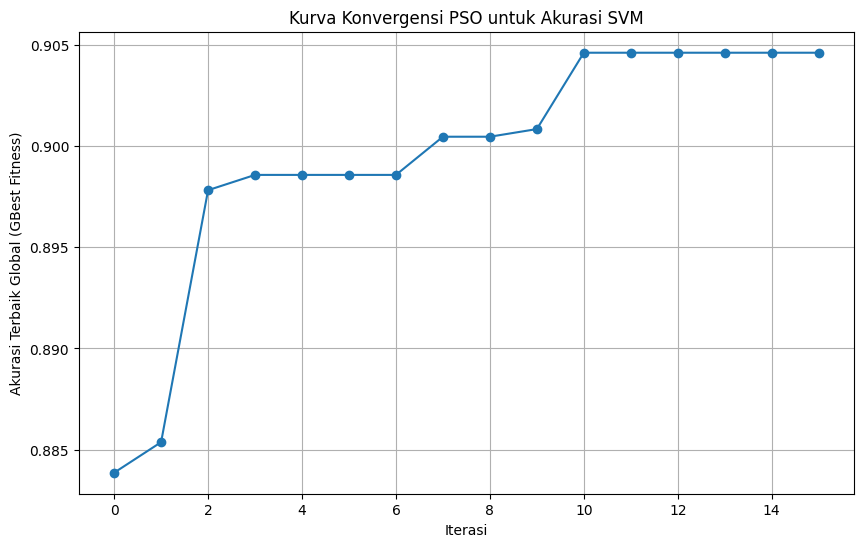

In [11]:
if gbest_svm_history and len(gbest_svm_history) > 1: # Pastikan history tidak kosong dan memiliki lebih dari satu titik
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(gbest_svm_history)), gbest_svm_history, marker='o', linestyle='-')
    plt.title('Kurva Konvergensi PSO untuk Akurasi SVM')
    plt.xlabel('Iterasi')
    plt.ylabel('Akurasi Terbaik Global (GBest Fitness)')
    plt.grid(True)
    plt.show()
else:
    print("Tidak ada data riwayat GBest yang cukup untuk diplot, atau optimasi PSO belum dijalankan.")

## 6. Training Model SVM Final dan Evaluasi pada Test Set

Setelah mendapatkan parameter optimal (`C` dan `gamma`) dari PSO, langkah selanjutnya adalah melatih model SVM final. Model ini akan dilatih menggunakan **keseluruhan training set** (`X_train_scaled`, `y_train`) dengan parameter optimal tersebut.

Setelah model final dilatih, kita akan mengevaluasi kinerjanya pada **test set** (`X_test_scaled`, `y_test`) untuk melihat seberapa baik model tersebut menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

In [12]:
if optimal_svm_params is not None:
    # Ambil parameter optimal dari hasil PSO
    C_optimal = optimal_svm_params[0]
    gamma_optimal = optimal_svm_params[1]

    print(f"Melatih Model SVM Final dengan parameter optimal:")
    print(f"  C     = {C_optimal:.4f}")
    print(f"  gamma = {gamma_optimal:.4f}")

    # Inisialisasi model SVM final dengan parameter optimal
    final_svm_model = SVC(C=C_optimal, gamma=gamma_optimal, kernel='rbf', probability=True, random_state=42)

    # Latih model pada keseluruhan data latih (X_train_scaled, y_train)
    start_time_final_train = time.time()
    final_svm_model.fit(X_train_scaled, y_train)
    end_time_final_train = time.time()
    print(f"Pelatihan model SVM final selesai dalam {end_time_final_train - start_time_final_train:.2f} detik.")

    # Lakukan prediksi pada data uji (X_test_scaled)
    y_pred_test = final_svm_model.predict(X_test_scaled)

    print("\nPrediksi pada test set selesai.")

else:
    print("Parameter optimal SVM belum tersedia dari proses PSO. Tidak dapat melatih model final.")
    y_pred_test = None # Inisialisasi jika error

Melatih Model SVM Final dengan parameter optimal:
  C     = 48.9122
  gamma = 0.2456
Pelatihan model SVM final selesai dalam 14.90 detik.

Prediksi pada test set selesai.


### 6.1. Evaluasi Kinerja Final Model

Akan digunakan beberapa metrik untuk mengevaluasi kinerja model SVM final pada test set:
* **Akurasi:** Persentase prediksi yang benar secara keseluruhan.
* **Laporan Klasifikasi (Classification Report):** Menampilkan presisi, recall, F1-score, dan support untuk setiap kelas.
    * **Presisi (Precision):** Dari semua prediksi positif untuk sebuah kelas, berapa banyak yang benar-benar positif. (TP / (TP + FP))
    * **Recall (Sensitivity):** Dari semua instance aktual positif sebuah kelas, berapa banyak yang berhasil diprediksi dengan benar. (TP / (TP + FN))
    * **F1-score:** Rata-rata harmonik dari presisi dan recall. (2 * (Precision * Recall) / (Precision + Recall))
* **Confusion Matrix:** Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

Akurasi Model SVM Final pada Test Set: 0.9110

Laporan Klasifikasi pada Test Set:
                 precision    recall  f1-score   support

'In Moderation'       0.92      0.90      0.91      1330
   'Less Often'       0.90      0.93      0.91      1124
   'More Often'       0.90      0.90      0.90       198

       accuracy                           0.91      2652
      macro avg       0.91      0.91      0.91      2652
   weighted avg       0.91      0.91      0.91      2652


Confusion Matrix pada Test set:


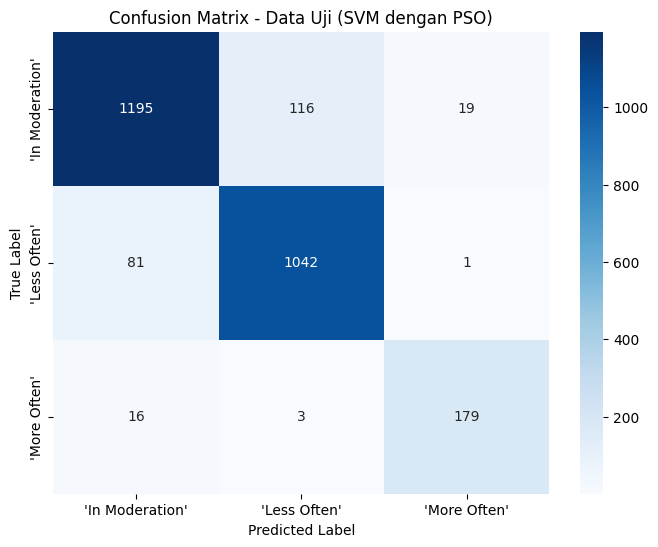

In [13]:
if y_pred_test is not None and 'y_test' in locals():
    # Hitung Akurasi pada Data Uji
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Akurasi Model SVM Final pada Test Set: {accuracy_test:.4f}")

    # Tampilkan Laporan Klasifikasi
    print("\nLaporan Klasifikasi pada Test Set:")
    # Dapatkan nama kelas asli dari label_encoder jika ada
    if 'label_encoder' in locals():
        target_names_display = label_encoder.classes_
        print(classification_report(y_test, y_pred_test, target_names=target_names_display))
    else:
        print(classification_report(y_test, y_pred_test))

    # Tampilkan Confusion Matrix
    print("\nConfusion Matrix pada Test set:")
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Plot Confusion Matrix agar lebih mudah dibaca
    plt.figure(figsize=(8, 6))
    if 'label_encoder' in locals():
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        
    plt.title('Confusion Matrix - Data Uji (SVM dengan PSO)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

else:
    print("Prediksi pada data uji (y_pred_test) atau data uji aktual (y_test) belum tersedia.")

## 7. Kesimpulan

Dalam proyek ini, kami telah berhasil mengimplementasikan Particle Swarm Optimization (PSO) untuk mengoptimalkan hyperparameter `C` dan `gamma` dari model Support Vector Machine (SVM) dengan kernel RBF. Tujuan klasifikasi adalah untuk memprediksi kategori makanan berdasarkan fitur nutrisinya dari dataset `food_items.csv`.

Langkah-langkah utama yang dilakukan meliputi:
1.  Pemuatan dan pre-processing data, termasuk encoding fitur categorical, penanganan nilai yang hilang (jika ada), dan feature scaling.
2.  Implementasi fungsi fitness yang melatih dan mengevaluasi model SVM dengan parameter tertentu.
3.  Implementasi algoritma PSO untuk mencari kombinasi parameter `C` dan `gamma` yang memaksimalkan akurasi pada set validasi internal PSO.
4.  Pelatihan model SVM final menggunakan parameter optimal yang ditemukan oleh PSO pada keseluruhan training set.
5.  Evaluasi model SVM final pada testing set yang terpisah.

**Hasil Utama:**
* Parameter optimal yang ditemukan oleh PSO adalah:
    * `C` = 48.9122
    * `gamma` = 0.2456
* Akurasi terbaik yang dicapai pada set validasi selama proses PSO adalah 0.9046.
* Model SVM final yang dilatih dengan parameter optimal ini mencapai **akurasi sebesar 0.9110** pada test set.
* Laporan klasifikasi menunjukkan performa yang baik (presisi, recall, F1-score) untuk setiap kelas target.

Hasil ini menunjukkan bahwa PSO dapat menjadi alat yang efektif untuk menyetel hyperparameter model machine learning seperti SVM, yang berpotensi meningkatkan kinerja prediktifnya dibandingkan dengan pemilihan parameter secara manual atau grid search yang mungkin lebih terbatas cakupannya (meskipun grid search bisa lebih sistematis). Penggunaan PSO membantu mengotomatiskan proses pencarian parameter dalam ruang pencarian yang kontinu.